In [1]:
#Importing of the required Libaries
import datetime as dt
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
from scipy import stats 
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as pyo
import yfinance as yf

pyo.init_notebook_mode(connected=True)
pd.options.plotting.backend = 'plotly'

In [10]:
#Section where we retrive our data
end = dt.datetime.now()
start = dt.datetime(2016,1,1)
#Doing 2016 since that is when Sundar Pichai became CEO of Google/Alphabet (Considering using 2010)
yf.pdr_override()
df = pdr.get_data_yahoo(['APA', 'CNQ', 'COP', 'CTRA', 'DVN', 'EOG', 'EQT','FANG', 'HES', 'MRO', 'OVV', 'OXY', 'PR', 'TPL', 'WDS', 'XOP'], start, end)
Close = df.Close
Close.head()


[*********************100%%**********************]  16 of 16 completed


Ticker,APA,CNQ,COP,CTRA,DVN,EOG,EQT,FANG,HES,MRO,OVV,OXY,PR,TPL,WDS,XOP
Date,,,,,,,,,,,,,,,,
2016-01-04,44.430000,10.563173,46.880001,17.590000,32.320000,69.680000,28.933043,66.110001,48.180000,12.82,25.650000,67.295403,NaN,41.586666,21.070000,121.480003
2016-01-05,43.529999,10.739471,47.400002,17.570000,32.830002,70.129997,28.633642,65.190002,48.070000,12.76,26.350000,68.413498,NaN,42.006668,20.540001,121.080002
2016-01-06,38.529999,10.210578,45.349998,16.020000,30.209999,67.320000,26.962439,62.200001,45.070000,11.28,24.750000,65.328751,NaN,41.389999,19.740000,112.760002
2016-01-07,36.549999,9.573947,44.060001,16.580000,28.059999,65.459999,28.236256,60.400002,43.619999,10.67,23.549999,64.150757,NaN,42.553333,18.809999,109.959999
2016-01-08,36.650002,9.456415,43.290001,17.200001,28.500000,65.519997,29.640718,60.759998,43.580002,10.35,24.450001,63.062611,NaN,40.836666,19.280001,110.480003


In [11]:
#Computing Log based Returns
log_returns = np.log(df.Close/df.Close.shift(1)).dropna()
log_returns

Ticker,APA,CNQ,COP,CTRA,DVN,EOG,EQT,FANG,HES,MRO,OVV,OXY,PR,TPL,WDS,XOP
Date,,,,,,,,,,,,,,,,
2016-04-18,0.026355,0.027967,0.029314,0.016366,0.018928,0.022593,0.017919,0.021121,0.045645,0.026547,0.001498,0.015813,0.000000,-0.008558,0.017840,0.020068
2016-04-19,0.029137,0.021890,0.044761,0.002986,0.049385,0.021589,0.018040,0.005849,0.021983,0.043214,0.058156,0.021059,0.000000,0.002281,0.040901,0.024972
2016-04-20,-0.006199,0.004321,0.000425,0.001702,0.033058,0.003028,-0.005685,0.013876,0.000164,0.007854,0.015417,0.002801,0.000000,0.004946,-0.007572,0.013705
2016-04-21,0.001827,0.008587,-0.018219,-0.029776,-0.023880,-0.002649,-0.022470,-0.010843,-0.016480,-0.014327,-0.014006,-0.006012,0.000000,-0.010724,0.011337,-0.010480
2016-04-22,0.025592,0.003938,0.029624,0.018660,0.036747,0.021990,0.023346,0.013596,0.051808,0.034046,0.052210,0.016349,0.000000,0.001347,0.007021,0.034516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-09,-0.004580,0.012135,0.003135,0.004575,-0.004221,-0.002053,0.004512,0.011479,0.007094,0.001099,0.000235,-0.002052,0.005491,-0.006314,0.014423,0.000367
2024-08-12,0.030258,0.025519,0.012990,0.009909,0.009086,0.017548,0.036620,0.007580,0.004528,0.020305,0.014022,0.009711,0.023674,0.012252,0.010683,0.013468
2024-08-13,-0.009293,0.002516,-0.015479,-0.016570,-0.015339,-0.018893,-0.035014,-0.025918,-0.007584,-0.015919,-0.014022,-0.026109,-0.018213,-0.015893,-0.003548,-0.010321


In [12]:
#Calculating Daily & Annualized STD of Log Based Returns
daily_std = log_returns.std()
annualized_vol = (daily_std * np.sqrt(252))*100
annualized_vol

Ticker
APA     62.810167
CNQ     42.650194
COP     38.837325
CTRA    36.576970
DVN     52.618911
EOG     41.611453
EQT     50.514968
FANG    52.616576
HES     45.188436
MRO     54.302522
OVV     72.766898
OXY     53.917675
PR      82.751692
TPL     45.859066
WDS     34.741959
XOP     42.768760
dtype: float64

C:\Users\arroy\anaconda3\Anaconda_Files_2024\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



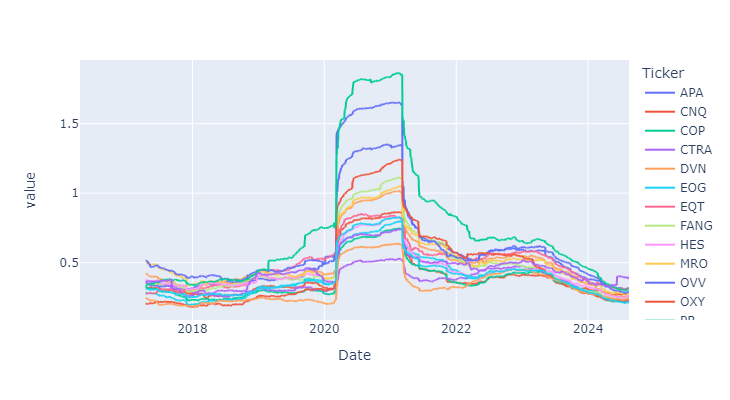

In [13]:
#Generating a figure to visualize the volatility over time
TRADING_DAYS = 252
volatility = log_returns.rolling(window=TRADING_DAYS).std()*np.sqrt(TRADING_DAYS)
volatility.plot().update_layout(autosize=False, width=600, height=400)

In [14]:
# Understanding the data we're working with
volatility.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2097 entries, 2016-04-18 to 2024-08-15
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   APA     1846 non-null   float64
 1   CNQ     1846 non-null   float64
 2   COP     1846 non-null   float64
 3   CTRA    1846 non-null   float64
 4   DVN     1846 non-null   float64
 5   EOG     1846 non-null   float64
 6   EQT     1846 non-null   float64
 7   FANG    1846 non-null   float64
 8   HES     1846 non-null   float64
 9   MRO     1846 non-null   float64
 10  OVV     1846 non-null   float64
 11  OXY     1846 non-null   float64
 12  PR      1846 non-null   float64
 13  TPL     1846 non-null   float64
 14  WDS     1846 non-null   float64
 15  XOP     1846 non-null   float64
dtypes: float64(16)
memory usage: 278.5 KB


In [15]:
#Generating statistics on the data we gather
volatility.describe()

Ticker,APA,CNQ,COP,CTRA,DVN,EOG,EQT,FANG,HES,MRO,OVV,OXY,PR,TPL,WDS,XOP
count,1846.000000,1846.000000,1846.000000,1846.000000,1846.000000,1846.000000,1846.000000,1846.000000,1846.000000,1846.000000,1846.000000,1846.000000,1846.000000,1846.000000,1846.000000,1846.000000
mean,0.578407,0.406668,0.374227,0.364958,0.505406,0.402003,0.501207,0.496322,0.442639,0.520807,0.647654,0.477336,0.742972,0.450295,0.331790,0.412210
std,0.311225,0.173128,0.144372,0.085006,0.200095,0.160368,0.163676,0.237541,0.145707,0.200469,0.392997,0.309805,0.459514,0.122755,0.132978,0.164569
min,0.300930,0.242884,0.210673,0.219554,0.250710,0.195058,0.274003,0.228752,0.244367,0.271041,0.276418,0.181023,0.295891,0.259353,0.185729,0.209613
25%,0.363278,0.302833,0.277885,0.298450,0.362426,0.272984,0.339079,0.342132,0.348923,0.388625,0.427420,0.230251,0.380410,0.364715,0.227354,0.287756
50%,0.476347,0.343524,0.314945,0.350128,0.437581,0.359805,0.518815,0.392778,0.402617,0.447499,0.512882,0.314920,0.638708,0.432634,0.294501,0.371207
75%,0.597044,0.411366,0.428191,0.443298,0.550967,0.452440,0.565325,0.525396,0.455937,0.546354,0.610489,0.571348,0.828684,0.500755,0.413275,0.447521
max,1.350573,0.862984,0.747676,0.529762,1.015987,0.800492,0.852925,1.112342,0.827400,1.052042,1.652733,1.241039,1.863911,0.739613,0.636042,0.826868


Text(0.5, 1.0, 'Securities Correlation Matrix')

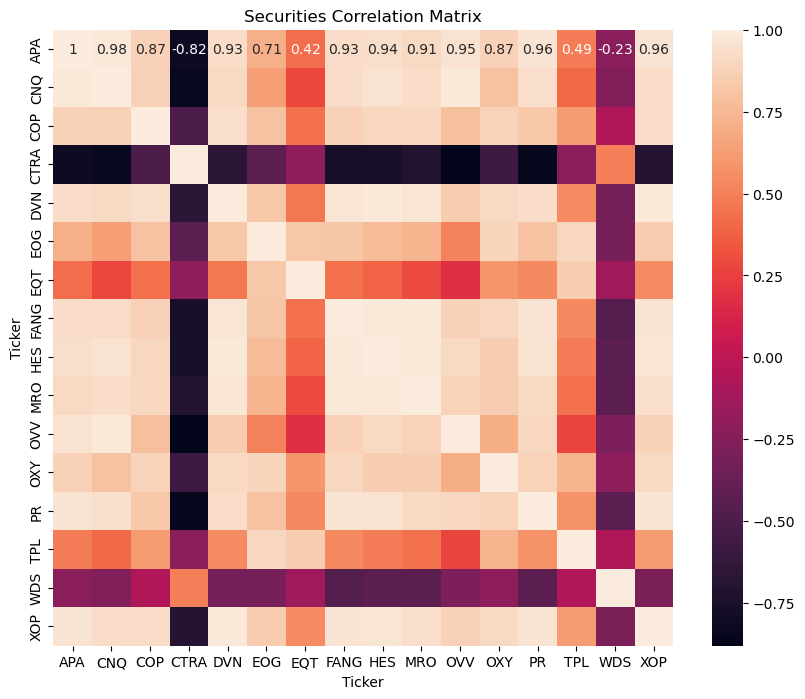

In [17]:
#Atempting to create the correlation matrix
corr_mat_vol = volatility.corr().round(2)
corr_mat_vol

plt.figure(figsize=(10,8))

#plt.set_properties(**{'font-size':'100pt'})
plot = sns.heatmap(corr_mat_vol.corr().round(2), annot = True)
plot.set_title("Securities Correlation Matrix")